In [1]:
import pandas as pd
import numpy as np

In [2]:
adult_df=pd.read_csv(r'C:\Python\Logistic\adult_data.csv',header=None,delimiter=' *, *',engine='python')
adult_df.head()

#there are no headers we will manually handle headers later
#delimiter == remove the special characters like '?'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


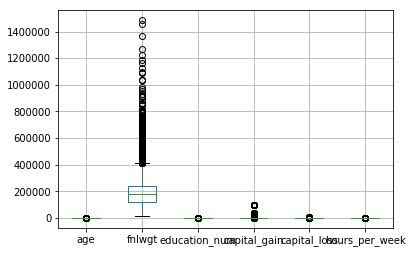

In [10]:
import matplotlib.pyplot as plt

adult_df.boxplot()
plt.show()

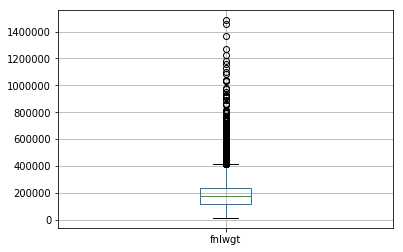

In [12]:
adult_df.boxplot(column='fnlwgt')
plt.show()


#if you have a cluster of points being detected as outliers do not impute the variable

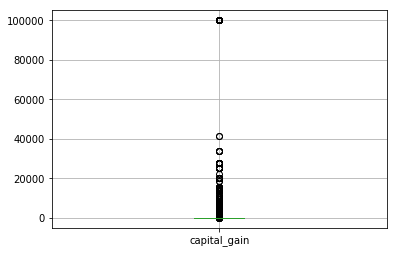

In [13]:
adult_df.boxplot(column='capital_gain')
plt.show()

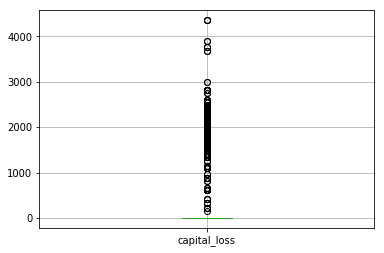

In [14]:
adult_df.boxplot(column='capital_loss')
plt.show()

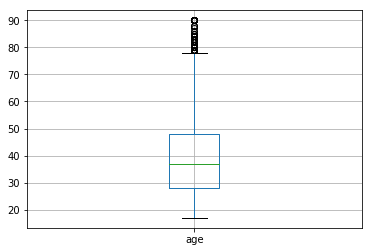

In [16]:
adult_df.boxplot(column='age')
plt.show()

In [17]:
q1= adult_df['age'].quantile(0.25)    #first quartile value
q3= adult_df['age'].quantile(0.75)    #third quartile value

iqr=q3-q1    #Interquartile range

low=q1-1.5*iqr
high=q3+1.5*iqr

In [18]:
adult_df_include = adult_df.loc[(adult_df['age'] >= low) & (adult_df['age'] <= high)]     #meeting the acceptable range

adult_df_exclude = adult_df.loc[(adult_df['age'] < low) | (adult_df['age'] > high)]       #not  #meeting the acceptable range

In [19]:
print(adult_df_include.shape)
print(adult_df_exclude.shape)

(32418, 15)
(143, 15)


In [20]:
print(low)

-2.0


**Imputing Techniques**

**Capping Approach (more preferred)**

**Measure of CT**

In [ ]:
#Measure of CT approach

In [21]:
age_mean = int(adult_df_include.age.mean())
print(age_mean)

38


In [22]:
adult_df_exclude.age=age_mean

C:\Users\ALI\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
#getting back the original shape of df

adult_df_rev=pd.concat([adult_df_include,adult_df_exclude])
adult_df_rev.shape

(32561, 15)

In [ ]:
#Capping Approach

In [24]:
adult_df_exclude.loc[adult_df_exclude['age'] < low, "age"] = low
adult_df_exclude.loc[adult_df_exclude['age'] > high, "age"] = high

C:\Users\ALI\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


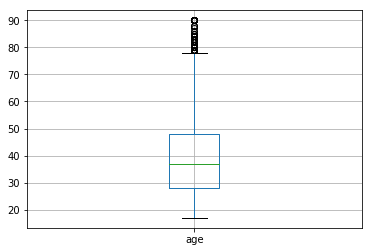

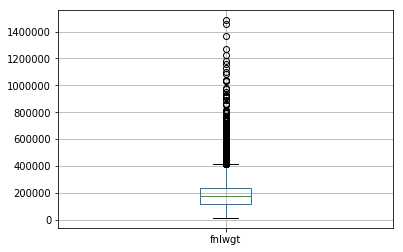

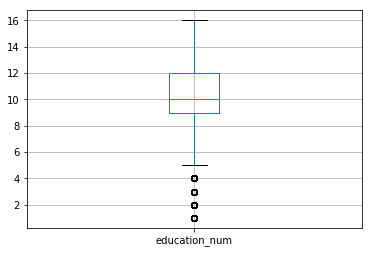

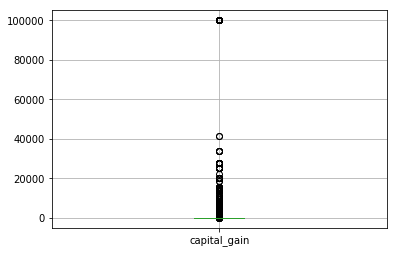

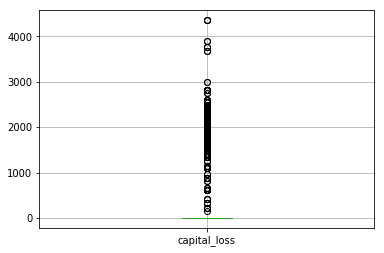

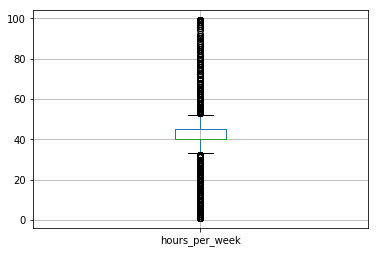

In [26]:
import matplotlib.pyplot as plt
colname=[]
for x in adult_df.columns[:-1]:
    if adult_df[x].dtype=="int64" or adult_df[x].dtype=="float64":
        colname.append(x)

for x in colname:
    adult_df.boxplot(column=x)
    plt.show()
